<a href="https://colab.research.google.com/github/kuldeep725/AI/blob/master/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import string
import gensim.downloader as api
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


In [0]:
newsgroups_train = fetch_20newsgroups(subset='train')

In [0]:
nltk.download('punkt')
nltk.download('stopwords')
corpus = api.load('text8')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Preprocess the dataset

In [0]:
X = []
stop_words = set(stopwords.words('english'))
for x in newsgroups_train.data :
  x_low = x.lower()
  x_without_punctuation = x_low.translate(str.maketrans('','',string.punctuation))
  tokens = word_tokenize(x_without_punctuation)
  result = [word for word in tokens if word not in stop_words]
  X.append(result)

# Train model

In [0]:
# Rather than using preprocessed version of dimension 100 (could not find it), training with
# a larger corpus
model = Word2Vec(sentences=corpus, size=100, window=5, min_count=10, workers=4)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Vocabulary size

In [0]:
print("Vocabulary size =", len(model.wv.vocab))

Vocabulary size = 47134


# most similar words to 'car'

In [0]:
similar_words = model.wv.most_similar('car')
print("Similar words to car")
for word in similar_words :
  print(word[0], ",", word[1])

Similar words to car
driver , 0.7719327807426453
motorcycle , 0.7228819131851196
cars , 0.7040441036224365
truck , 0.683682382106781
taxi , 0.6755706667900085
vehicle , 0.6754202246665955
racer , 0.6464553475379944
audi , 0.642411470413208
racing , 0.6391880512237549
passenger , 0.635075032711029


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# top 5 similar to following operations

In [0]:
word1 = model.wv.most_similar(positive=['father','girl'], negative=['boy'], topn=5)
print("Similar words to first operation")
for word in word1 :
  print("\t", word[0], ",", word[1])
print()
word2 = model.wv.most_similar(positive=['sports','ball'], negative=['bat'], topn=5)
print("Similar words to second operation")
for word in word2 :
  print("\t", word[0], ",", word[1])

Similar words to first operation
	 mother , 0.8044160604476929
	 wife , 0.7724865674972534
	 grandmother , 0.725928544998169
	 lover , 0.7247296571731567
	 aunt , 0.719226062297821

Similar words to second operation
	 sport , 0.6866516470909119
	 leagues , 0.6319532990455627
	 football , 0.6219941973686218
	 tournaments , 0.6125756502151489
	 teams , 0.609716534614563


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# Create a TSNE plot for following words

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` i

[]

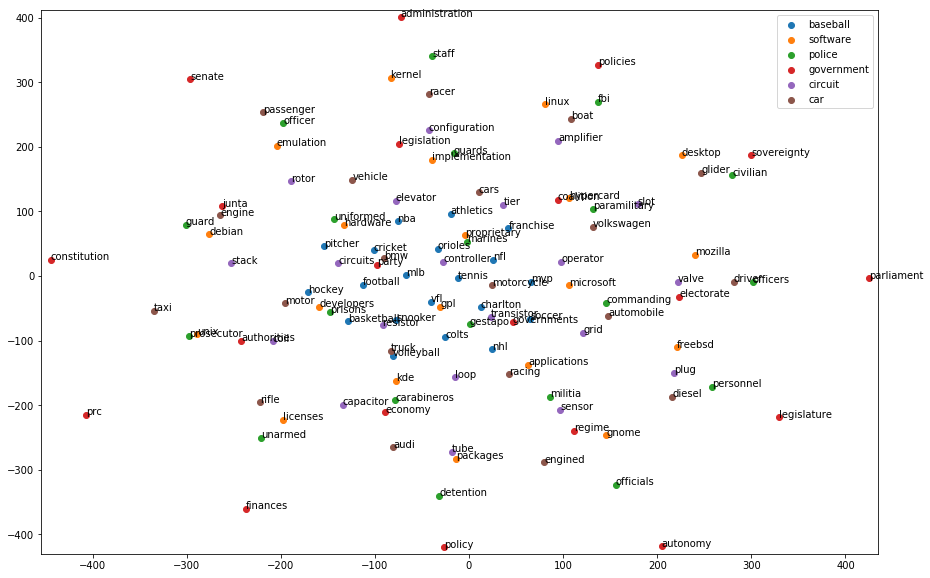

In [0]:
def display_tsne_plot(model, word) :
  similar_wordlist = model.wv.most_similar(positive=[word], topn=20)
  similar_wordlist = [word[0] for word in similar_wordlist]
  result = list(map(lambda x : model.wv[x], similar_wordlist))
  result = TSNE(n_components=2, random_state=42).fit_transform(result)  
  x_coord, y_coord = result[:,0], result[:,1]
  ax.scatter(x_coord, y_coord, label=word)
  for label, x, y in zip(similar_wordlist, x_coord, y_coord) :
    ax.annotate(label, xy=(x,y),  xytext=(0, 0),
                     textcoords='offset points')
  return x_coord.min(), y_coord.min(), x_coord.max(), y_coord.max() 
  
wordlist = ['baseball', 'software', 'police', 'government', 'circuit', 'car'] 
f, ax = plt.subplots(figsize=(15,10))
xmin, ymin = 1e10, 1e10
xmax, ymax = -1e10,-1e10
for word in wordlist :
  xmin_d, ymin_d, xmax_d, ymax_d = display_tsne_plot(model, word)
  xmin = min(xmin, xmin_d)
  ymin = min(ymin, ymin_d)
  xmax = max(xmax, xmax_d)
  ymax = max(ymax, ymax_d)
plt.legend()
plt.xlim(xmin-10, xmax+10)
plt.ylim(ymin-10, ymax+10)
plt.plot()

# Methods for creating feature vectors 
1. Continuous Bag of Words 
2. Skip gram

Skip gram model is used below.